In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## make a connection to the database

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## analyze only the users and not the admins

In [3]:
query = '''
SELECT *
FROM checker
WHERE uid LIKE 'user_%'
'''
checker = pd.io.sql.read_sql(query, conn)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


## create two lists of values (for working days and for weekends) for the histogram input

In [4]:
checker_new =  pd.DataFrame((pd.to_datetime(checker['timestamp'])).copy())
checker_new.columns=['datetime']
checker_new['uid']=checker['uid'].copy()
checker_new['date']= checker_new['datetime'].dt.date
checker_new['hour'] = checker_new['datetime'].dt.hour
checker_new['weekday'] = checker_new['datetime'].dt.dayofweek
checker_new['kind_of_the_day']= checker_new['weekday'].apply(lambda x: 'Working Day' if x < 5 else 'Weekend')
checker_new = checker_new.drop(columns = ['weekday'])
checker_new

,datetime,uid,date,hour,kind_of_the_day
0,2020-04-17 05:19:02.744528,user_4,2020-04-17,5,Working Day
1,2020-04-17 05:22:35.249331,user_4,2020-04-17,5,Working Day
2,2020-04-17 05:22:45.549397,user_4,2020-04-17,5,Working Day
3,2020-04-17 05:34:14.691200,user_4,2020-04-17,5,Working Day
4,2020-04-17 05:34:24.422370,user_4,2020-04-17,5,Working Day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,2020-05-21,20,Working Day
3203,2020-05-21 20:22:41.785725,user_1,2020-05-21,20,Working Day
3204,2020-05-21 20:22:41.877806,user_1,2020-05-21,20,Working Day
3205,2020-05-21 20:37:00.129678,user_1,2020-05-21,20,Working Day


In [5]:
working_days = checker_new[checker_new['kind_of_the_day'] ==
                      'Working Day'][['hour']].reset_index(drop=True)
weekends = checker_new[checker_new['kind_of_the_day'] ==
                      'Weekend'][['hour']].reset_index(drop=True)
working_days

,hour
0,5
1,5
2,5
3,5
4,5
...,...
2032,20
2033,20
2034,20
2035,20


In [6]:
weekends

,hour
0,7
1,13
2,13
3,13
4,13
...,...
1165,22
1166,22
1167,22
1168,22


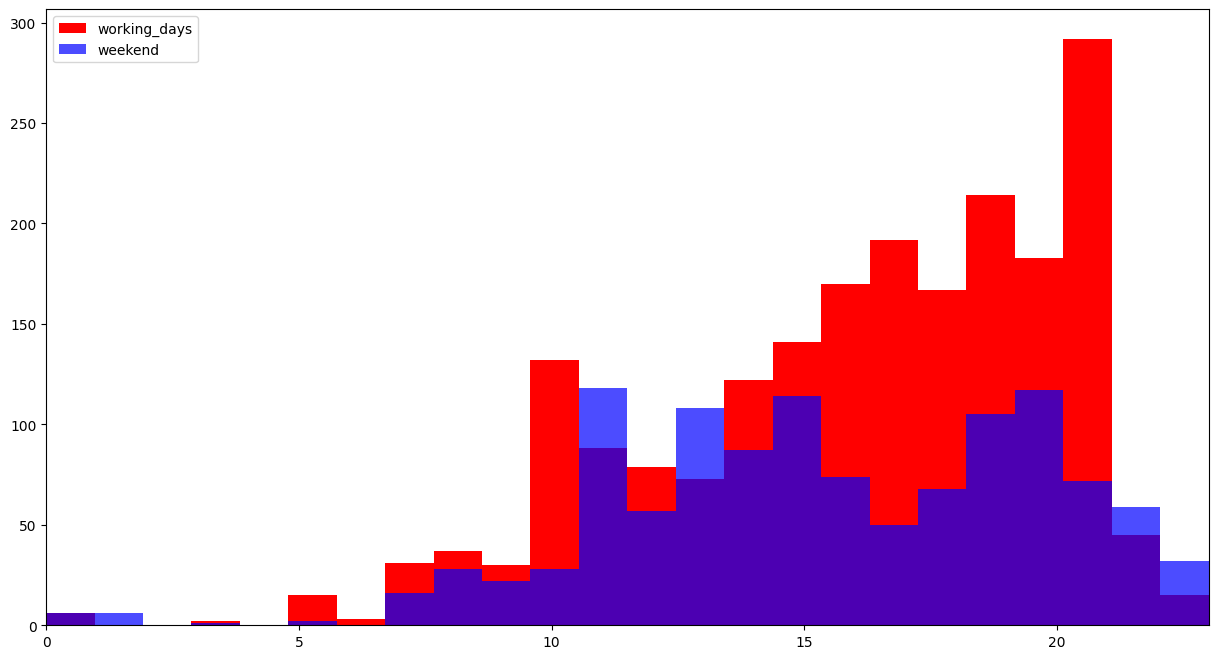

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_days['hour'],
        bins=24,
        label='working_days',
        color='r')
ax.hist(weekends['hour'],
        bins=24,
        label='weekend',
        color='b',
        alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='10')
plt.show()


## Are there hours when the total number of commits was higher on weekends than on working days? The answer: yes 11,13,22,23

## close the connection

In [8]:
conn.close()